## Importing Libraries

In [13]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Load the data
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)

In [14]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv",skiprows=[0],  header=None, names=col_names)

### Display the data

In [15]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection

In [16]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Split the data

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Making a decision tree model using sklearn's DecsionTreeClassifier()

In [93]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer
model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluvating the Model

In [94]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


# Visualization

In [85]:
from sklearn.tree import export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt

### Text Representation

In [36]:
# text representation of the tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 129.50
|   |--- feature_2 <= 26.30
|   |   |--- feature_2 <= 9.10
|   |   |   |--- feature_4 <= 114.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  114.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  9.10
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  26.30
|   |   |--- feature_3 <= 27.50
|   |   |   |--- feature_2 <= 45.40
|   |   |   |   |--- feature_5 <= 12.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  12.00
|   |   |   |   |   |--- feature_0 <= 7.00
|   |   |   |   |   |   |--- feature_6 <= 1.27
|   |   |   |   |   |   |   |--- feature_2 <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  30.95
|   |   |   |   |   |   |   |   |--- feature_5 <= 53.00

In [37]:
# save text representation to file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

## Graph Visualization

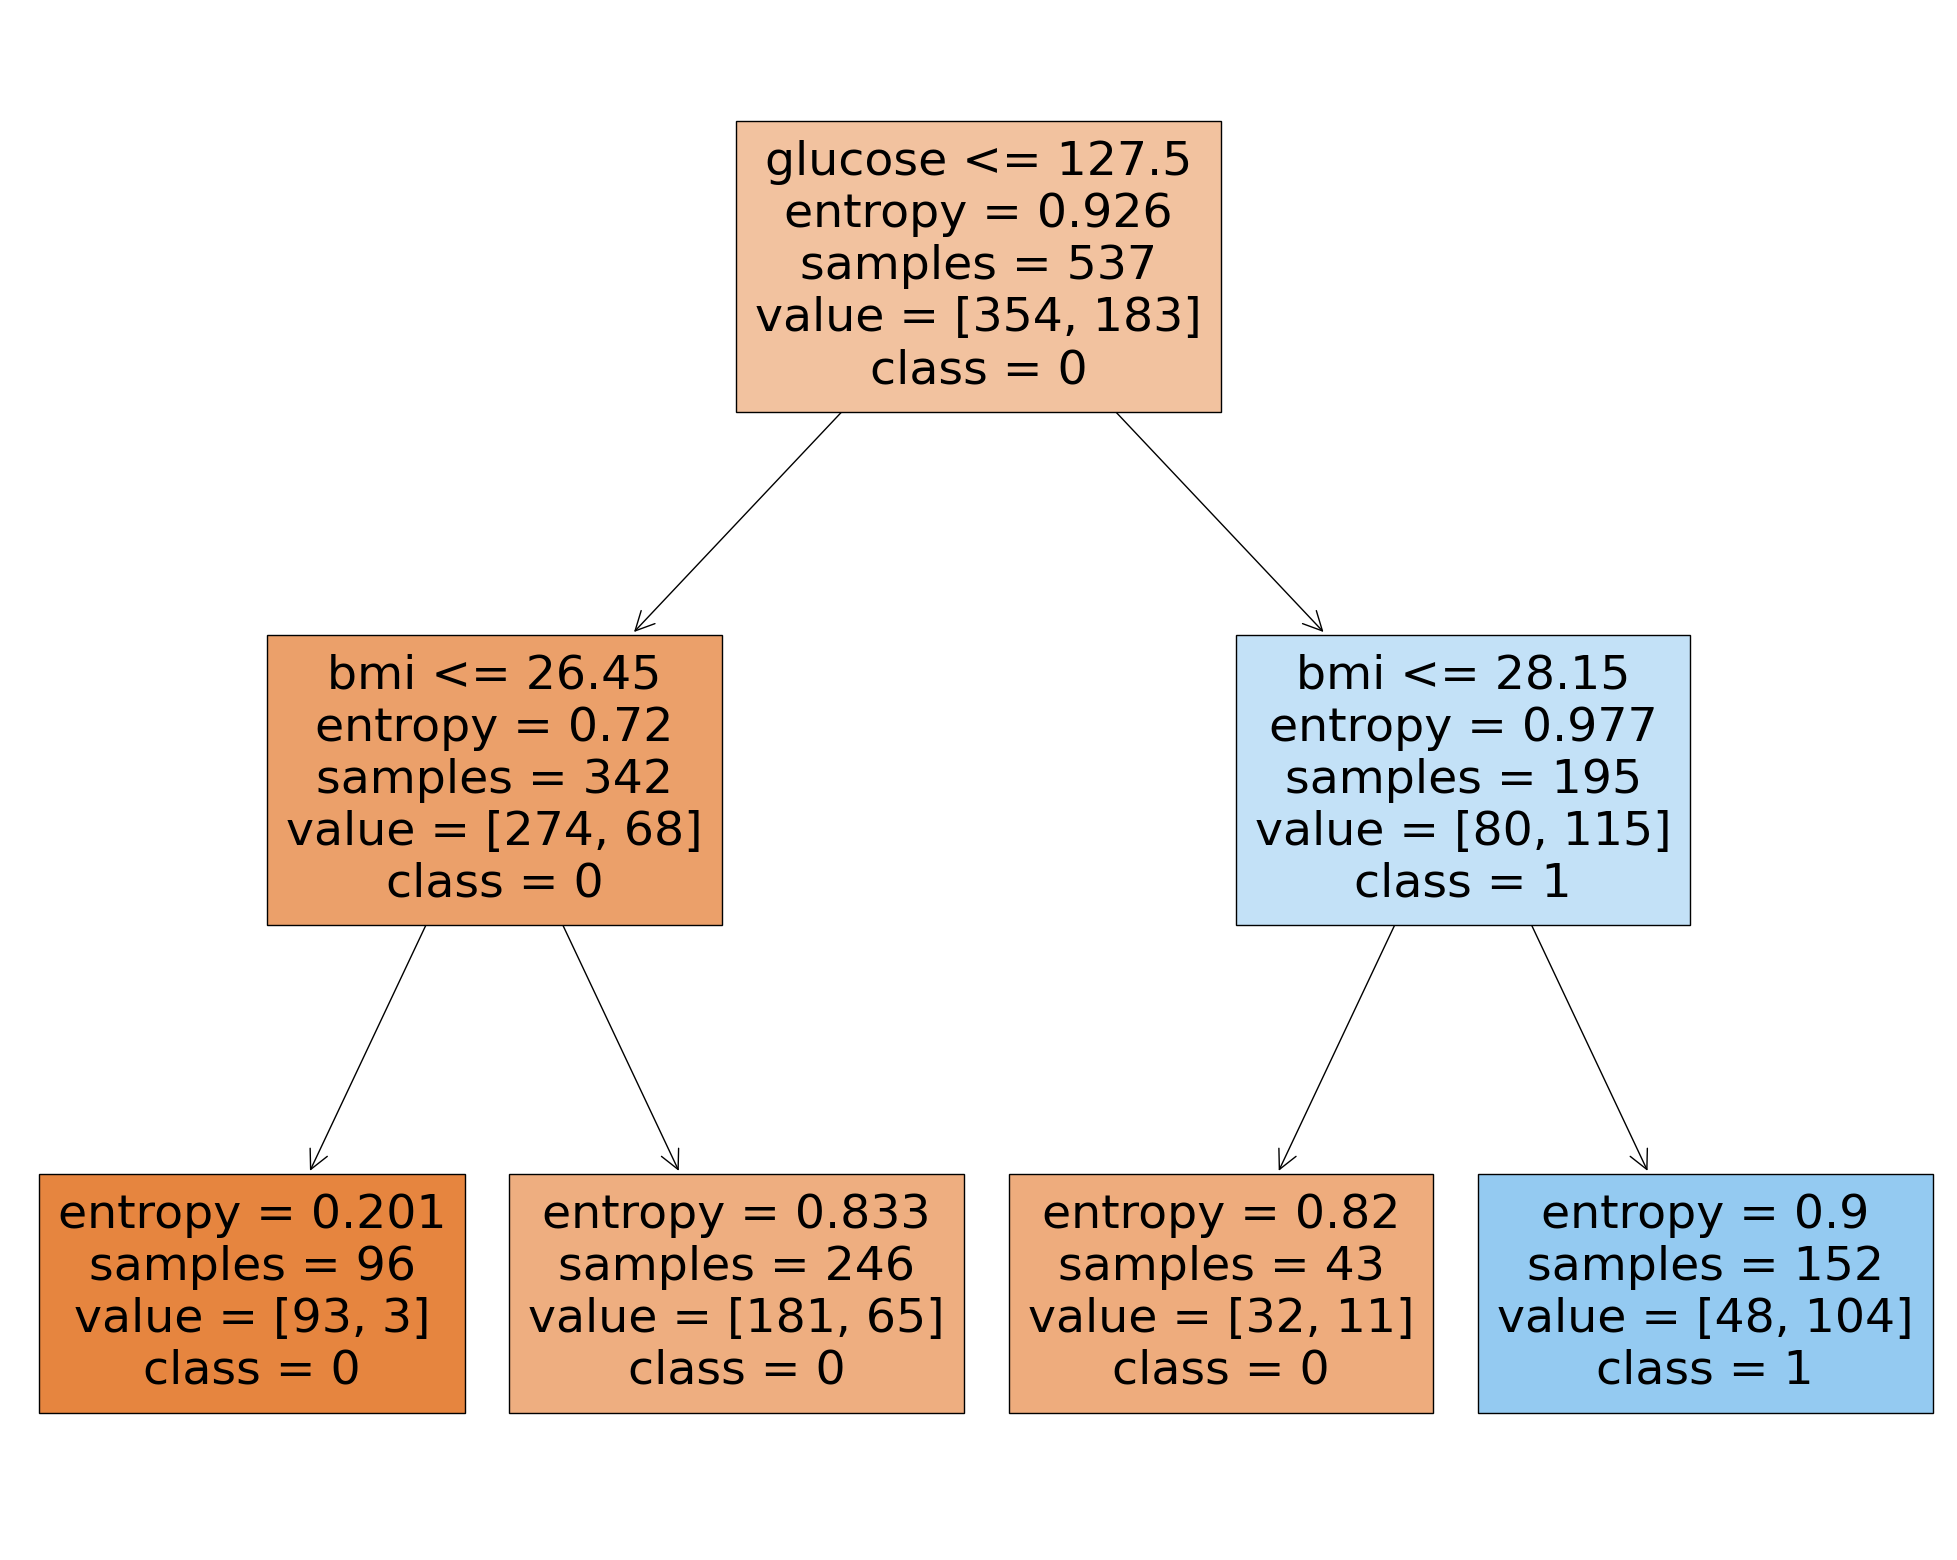

In [88]:
# Visualize the tree (max dept as 2 so that its properly visible.)
figure = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0', '1'],
                   filled=True)

In [34]:
# save tree to file
figure.savefig("decistion_tree.png")

# Optimization

Right now our model is only at around 70% accuracy

---

### The Parameters we can change:

#### criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

---

#### splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

---

#### max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

---

#### min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [92]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',  splitter='best', )

# Train Decision Tree Classifer
model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663
